# What effect the Interest Rate The Most in Bank Loans

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df = pd.read_csv('prosperLoanData.csv')
loan = df[['ListingKey','Term','MonthlyLoanPayment','BorrowerRate','ProsperScore','ListingCategory (numeric)','IncomeRange','Investors']]
loan.dropna(inplace = True)

C:\Users\MFHZ2\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
loan.shape

(84853, 8)

In [4]:
loan.head(10)

,ListingKey,Term,MonthlyLoanPayment,BorrowerRate,ProsperScore,ListingCategory (numeric),IncomeRange,Investors
1,10273602499503308B223C1,36,318.93,0.0920,7.0,2,"$50,000-74,999",1
3,0EF5356002482715299901A,36,321.45,0.0974,9.0,16,"$25,000-49,999",158
4,0F023589499656230C5E3E2,36,563.97,0.2085,4.0,2,"$100,000+",20
5,0F05359734824199381F61D,60,342.37,0.1314,10.0,1,"$100,000+",1
6,0F0A3576754255009D63151,36,122.67,0.2712,2.0,1,"$25,000-49,999",1
7,0F1035772717087366F9EA7,36,372.60,0.2019,4.0,2,"$25,000-49,999",1
8,0F043596202561788EA13D5,36,305.54,0.0629,9.0,7,"$25,000-49,999",1
9,0F043596202561788EA13D5,36,305.54,0.0629,11.0,7,"$25,000-49,999",1
10,0F123545674891886D9F106,60,395.37,0.2489,7.0,1,"$75,000-99,999",19
12,0F1A3597143888805163EF7,36,137.39,0.1435,4.0,1,"$25,000-49,999",1


In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ListingKey                 84853 non-null  object 
 1   Term                       84853 non-null  int64  
 2   MonthlyLoanPayment         84853 non-null  float64
 3   BorrowerRate               84853 non-null  float64
 4   ProsperScore               84853 non-null  float64
 5   ListingCategory (numeric)  84853 non-null  int64  
 6   IncomeRange                84853 non-null  object 
 7   Investors                  84853 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 5.8+ MB


In [6]:
loan.describe()

,Term,MonthlyLoanPayment,BorrowerRate,ProsperScore,ListingCategory (numeric),Investors
count,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000
mean,42.486135,291.930720,0.196022,5.950067,3.312647,68.264669
std,11.640346,186.678314,0.074631,2.376501,4.364277,95.195831
min,12.000000,0.000000,0.040000,1.000000,0.000000,1.000000
25%,36.000000,157.330000,0.135900,4.000000,1.000000,1.000000
50%,36.000000,251.940000,0.187500,6.000000,1.000000,32.000000
75%,60.000000,388.350000,0.257400,8.000000,3.000000,97.000000
max,60.000000,2251.510000,0.360000,11.000000,20.000000,1189.000000


In [7]:
indexs = loan[ loan['ProsperScore'] > 10 ].index
loan.drop(indexs , inplace=True)

C:\Users\MFHZ2\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### What is the structure of your dataset?

There are about 84k loan information in the dataset with 7 columns (ListingKey, Term, MonthlyLoanPayment, BorrowerRate, ProsperScor, ListingCategory, IncomeRange, and Investors). Here is some important information about some of the variables 

ProsperScore: The score ranges from 1-10, with 10 being the best, or lowest risk score.<br>
ListingCategory: The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans


### What is/are the main feature(s) of interest in your dataset?

I'm intersted in finding what have the most impact on the Borrower Rate 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that the Prosper Score will have the most impact on the monthly payment. the higher the Score the lower the interest. other parameters will have less impact on the monthly payment.

## Distribution of Interest rate
It looks roughly bimodal with one peak between 0.15 and 0.2 and the other near 0.25. We can see after the second peak there is a hug jump and then hug drop.

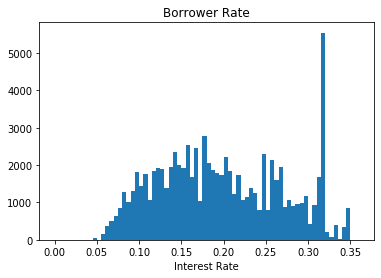

In [8]:

bins = np.arange(0, loan['BorrowerRate'].max()+0.005, 0.005)
plt.hist(data = loan, x = 'BorrowerRate',bins=bins)
plt.title('Borrower Rate')
plt.xlabel('Interest Rate');


## Monthly Vs Interest rate
Lookng at the scutter plot we can see that the higher the monthly payment the lower the interst rate goes but because of the overlapping of observation points we can't conclude anything when the monthly payment goes down.

In the heat map it is clear that when  the monthly payment decreases the interest rate increases.

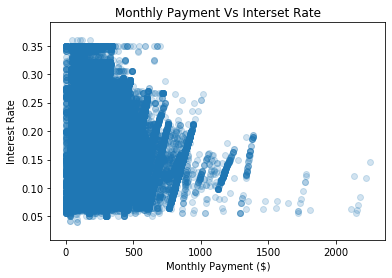

In [9]:
plt.scatter(data = loan, y = 'BorrowerRate', x = 'MonthlyLoanPayment', alpha = 0.2)
plt.title('Monthly Payment Vs Interset Rate')
plt.xlabel('Monthly Payment ($)')
plt.ylabel('Interest Rate');

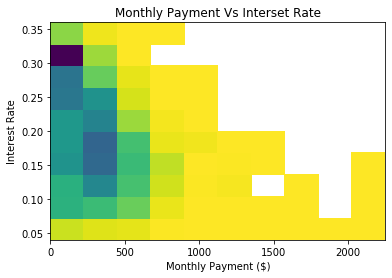

In [10]:
plt.hist2d(data = loan, y = 'BorrowerRate', x = 'MonthlyLoanPayment',cmap = 'viridis_r', cmin = 0.5)
plt.title('Monthly Payment Vs Interset Rate')
plt.xlabel('Monthly Payment ($)')
plt.ylabel('Interest Rate');

## What will cause the interst rate increase
From the first plot we can see that when the Income range increases the interst rate get lower. 


We can see from the second plot cotumer with higher Prosper Score get lower interest rate. Also, from the last plot we can see clearly that the costumer with higher income have tend to pay higher monthly payment.


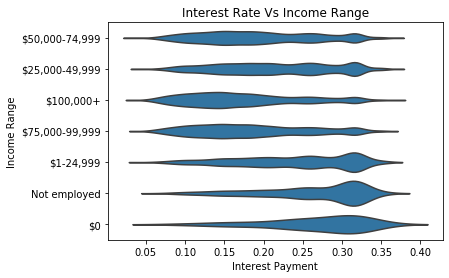

In [11]:
base_color = sb.color_palette()[0]
sb.violinplot(data = loan, x = 'BorrowerRate', y = 'IncomeRange', color = base_color,
              inner = None);
plt.title('Interest Rate Vs Income Range')
plt.xlabel('Interest Payment')
plt.ylabel('Income Range');

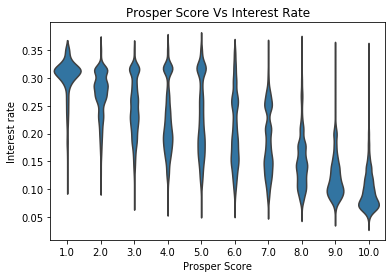

In [12]:
sb.violinplot(data = loan, y = 'BorrowerRate', x = 'ProsperScore', color = base_color,
              inner = None);
plt.title('Prosper Score Vs Interest Rate')
plt.ylabel('Interest rate')
plt.xlabel('Prosper Score');

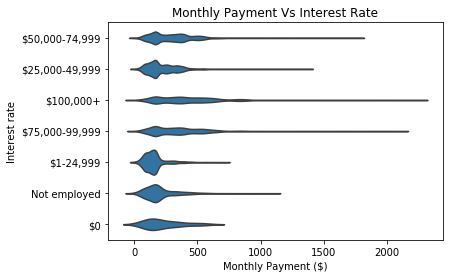

In [13]:
sb.violinplot(data = loan, y = 'IncomeRange', x = 'MonthlyLoanPayment', color = base_color,
              inner = None);
plt.title('Monthly Payment Vs Interest Rate')
plt.ylabel('Interest rate')
plt.xlabel('Monthly Payment ($)');



From the first Plot we can see that the interest rate decreases at high monthly payment in each income range and it is also showing that the when the income range increases the intest rate decreases. 

The second plot although it is clear that the lower interest rate the higher monthly payment have at one Prosper Score level and it is also showing that desbite the monthly payment, when the score increases the interast rate decreases. 


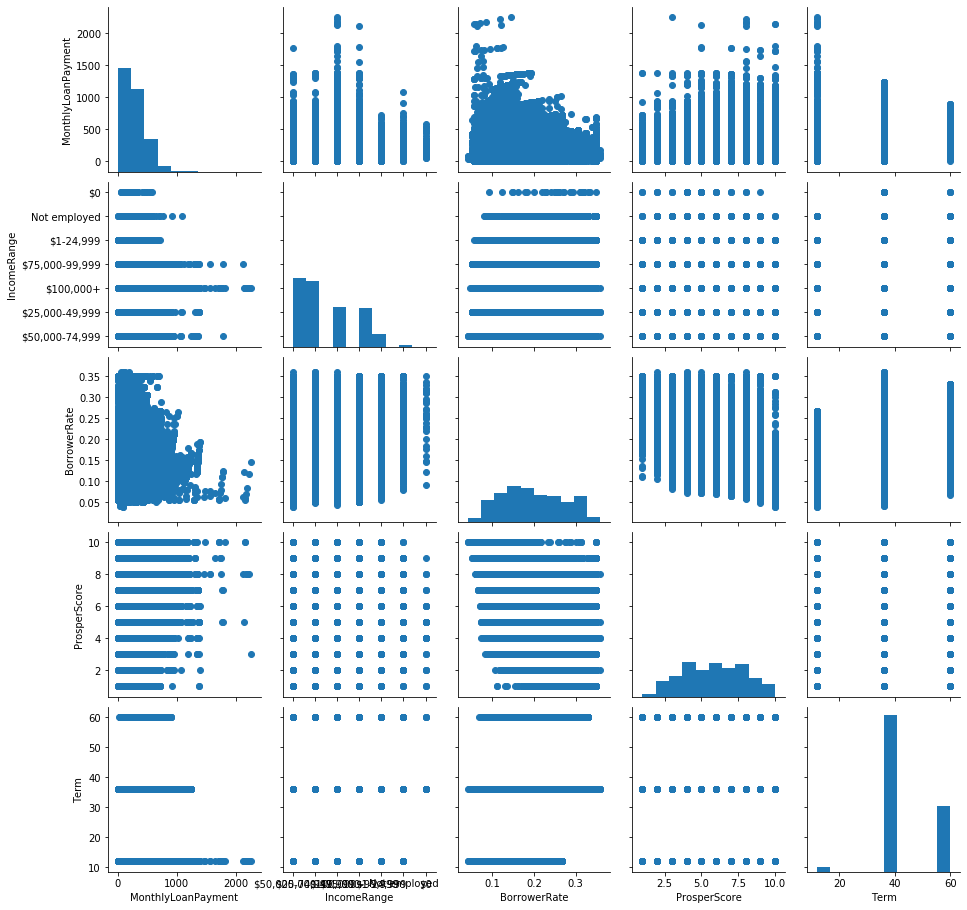

In [14]:
g = sb.PairGrid(data = loan, vars = ['MonthlyLoanPayment', 'IncomeRange', 'BorrowerRate','ProsperScore','Term'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

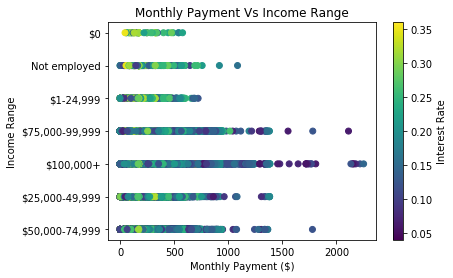

In [15]:
plt.scatter(data = loan,  x = 'MonthlyLoanPayment', y = 'IncomeRange', c = 'BorrowerRate')
plt.colorbar(label = 'Interest Rate');
plt.xlabel('Monthly Payment ($)')
plt.ylabel('Income Range')
plt.title('Monthly Payment Vs Income Range');

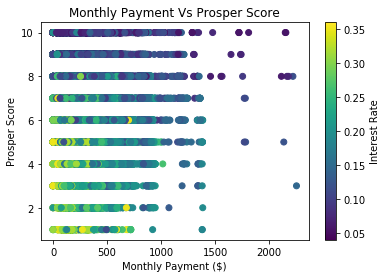

In [16]:
plt.scatter(data = loan,  x = 'MonthlyLoanPayment', y = 'ProsperScore', c = 'BorrowerRate')
plt.colorbar(label = 'Interest Rate')
plt.ylim
plt.xlabel('Monthly Payment ($)')
plt.ylabel('Prosper Score')
plt.title('Monthly Payment Vs Prosper Score');

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [19]:
!jupyter nbconvert "explanatory .ipynb" --to slides --template output_toggle

[NbConvertApp] Converting notebook explanatory .ipynb to slides
[NbConvertApp] Writing 559533 bytes to explanatory .slides.html
